In [62]:
import numpy as np
import pandas as pd
df = pd.read_csv("D:\\Excelr_assignments\\EDA2\\EDA2\\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
df.shape

(32561, 15)

In [64]:
# knowing the datatypes in the dataset:

df.info()

# found that int and object data types are their in the data set :


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [65]:
# checking whether their are null values in the data set or not:

df.isnull().sum()

# and finally we found that their are no null values in the data set:


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [115]:
# seperating the numeric datatype and the string datatype:

num_col = df.select_dtypes(include = "int64")
str_col = df.select_dtypes(include = "object")
s_col = str_col.columns
n_col = num_col.columns
str_col


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
...,...,...,...,...,...,...,...,...,...
32554,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
32555,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K


<Axes: >

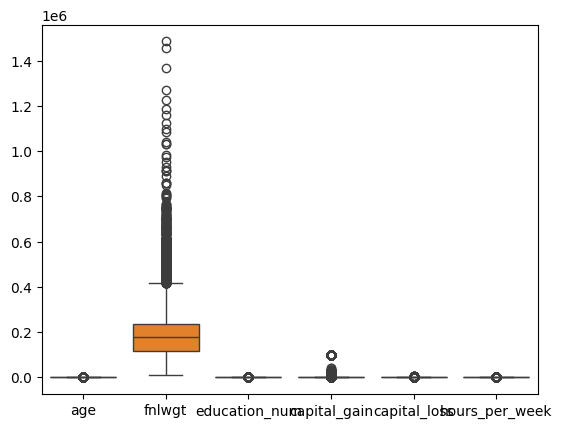

In [67]:
# checking whether their are any outlayers in the dataset or not:

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(num_col)


From the above grapg we can see the come of the columns are having the outlayers in them.

In [76]:
# removing the outlayers from the data set:

q1 = df.drop(columns = s_col).quantile(0.25)
q3 = df.drop(columns = s_col).quantile(0.75)
iqr = q3-q1
df = df[
        ~((df.drop(columns = s_col).lt(q1 - 1.5 * iqr)) | (df.drop(columns = s_col).gt(q3 + 1.5 * iqr))).any(axis=1)
]

<Axes: >

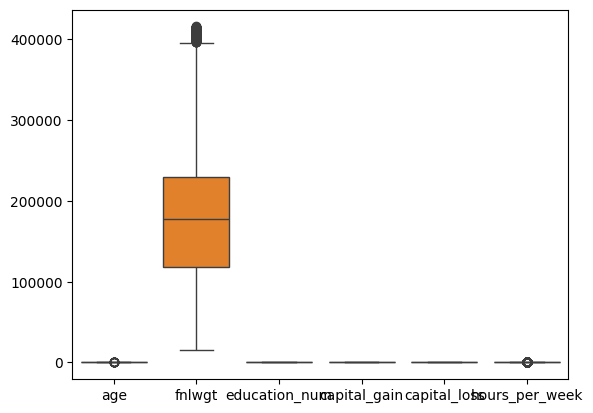

In [78]:
sns.boxplot(df)

So we can see that after removing the outlayers in the data set the graph has changed.

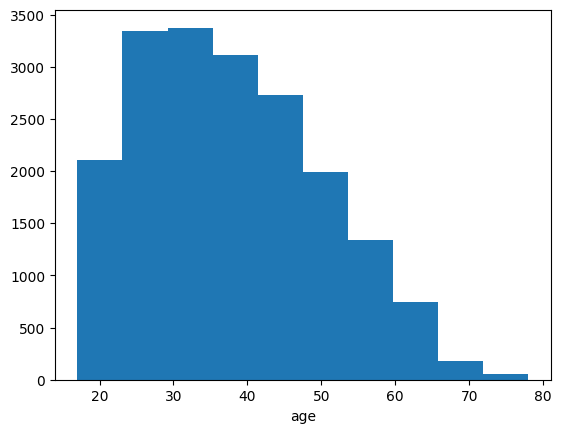

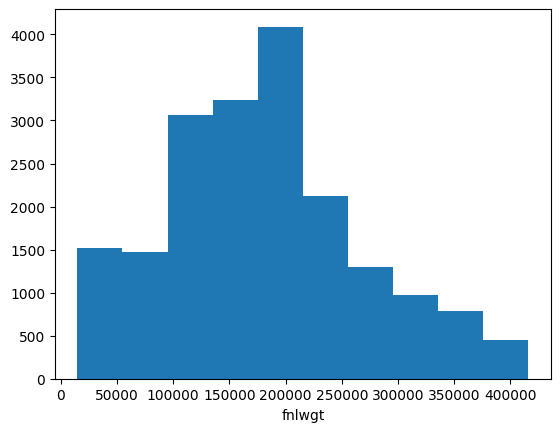

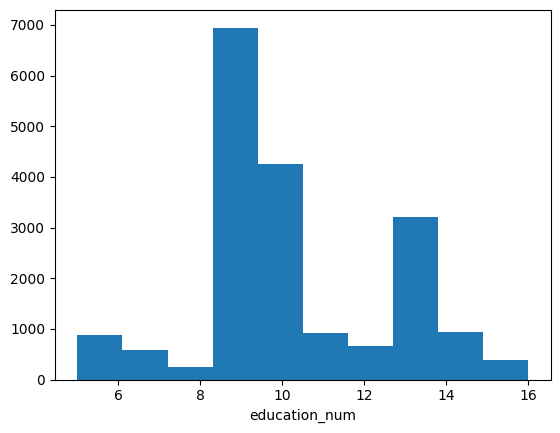

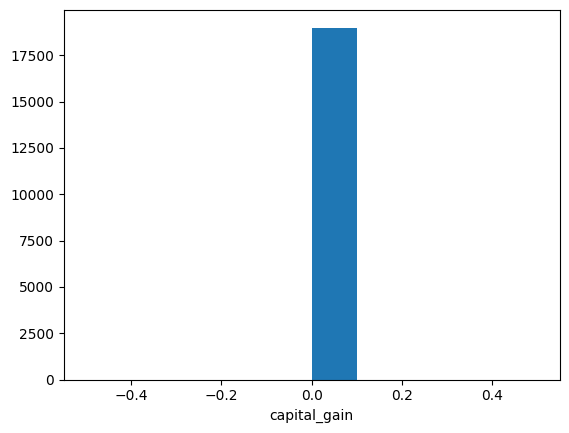

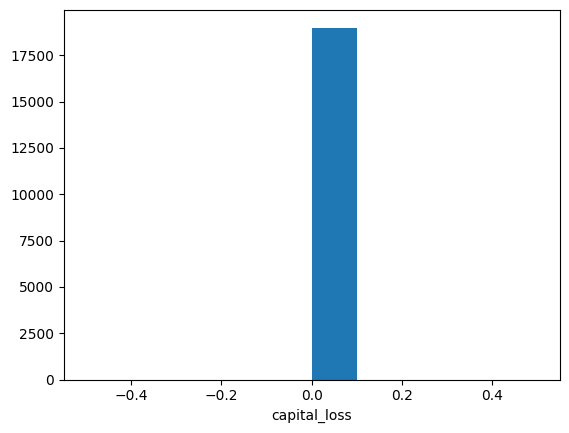

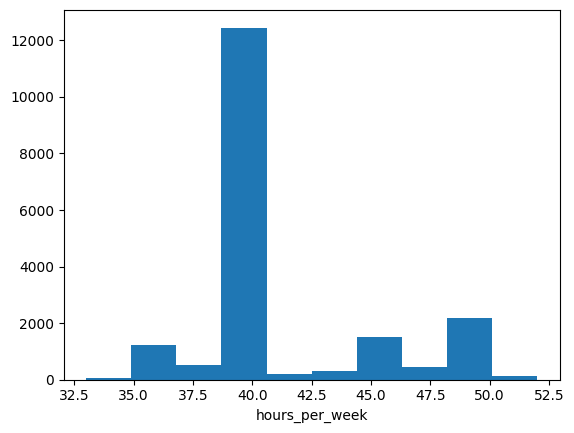

In [80]:
# ploting the histogram for all the numaric data to see the outcomes:

for col in num_col.columns:
    plt.figure()
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

In [118]:
col_l = []
col_o = []

for col in s_col:
    if str_col[col].nunique() >= 5:
        col_l.append(col)
    else:
        col_o.append(col)
print(col_l)
print(col_o)
        

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
['sex', 'income']


In [142]:
# data transformation:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_new = pd.DataFrame(ss.fit_transform(df[n_col]), columns=n_col, index=df.index)

# Label Encoding for columns with >= 5 unique categories
le = LabelEncoder()
for col in col_l:
    df_new[col] = le.fit_transform(df[col])

# One-Hot Encoding for columns with < 5 unique categories
oh = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = oh.fit_transform(df[col_o])

# Create DataFrame with correct index
encoded_df = pd.DataFrame(encoded_array, columns=oh.get_feature_names_out(col_o), index=df.index)
df_new = pd.concat([df_new, encoded_df], axis=1)


Any nulls in df_new: 0


In [143]:
df_new

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Male,income_ >50K
2,-0.004194,0.402333,-0.579040,0.0,0.0,-0.372163,4,8,0,6,1,4,38,1.0,0.0
3,1.243286,0.621585,-1.508332,0.0,0.0,-0.372163,4,1,2,6,0,2,38,1.0,0.0
4,-0.835847,1.813399,1.279543,0.0,0.0,-0.372163,4,6,2,10,5,2,5,0.0,0.0
5,-0.087359,1.194699,1.744189,0.0,0.0,-0.372163,4,9,2,4,5,4,38,0.0,0.0
7,1.160121,0.333321,-0.579040,0.0,0.0,0.893725,6,8,2,4,0,4,38,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,1.243286,1.623238,1.744189,0.0,0.0,-0.372163,4,9,2,4,0,4,38,1.0,1.0
32555,-1.334839,1.488606,-0.114394,0.0,0.0,-0.372163,4,11,4,11,1,4,38,1.0,0.0
32556,-0.919013,0.881136,0.814897,0.0,0.0,-0.878518,4,4,2,13,5,4,38,0.0,0.0
32557,0.162137,-0.301942,-0.579040,0.0,0.0,-0.372163,4,8,2,7,0,4,38,1.0,1.0


Creating 2 New Features .

--> Feature 1: capital_diff = capital-gain - capital-loss
Why because Instead of using both capital-gain and capital-loss separately, we combine them into a net capital feature. This better represents financial benefit/loss in one dimension.

--> Feature 2: work_hours_ratio = hours-per-week / 168
Why because 168 hours = total hours in a week. This feature shows what portion of the week is spent working. It's normalized and can help in comparing across individuals.



In [148]:
# Feature 1: Net capital difference

df['capital_diff'] = df['capital_gain'] - df['capital_loss']

# Feature 2: Proportion of week spent working

df['work_hours_ratio'] = df['hours_per_week'] / 168


C:\Users\dell\AppData\Local\Temp\ipykernel_3620\1608589954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capital_diff'] = df['capital_gain'] - df['capital_loss']
C:\Users\dell\AppData\Local\Temp\ipykernel_3620\1608589954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_hours_ratio'] = df['hours_per_week'] / 168


In [149]:
# Add to df_new after scaling:

df_new['capital_diff'] = ss.fit_transform(df[['capital_diff']])
df_new['work_hours_ratio'] = ss.fit_transform(df[['work_hours_ratio']])


In [151]:
# Apply log(1 + x) transformation to avoid log(0):

df['capital_gain_log'] = np.log1p(df['capital_gain'])
df_new['capital_gain_log'] = ss.fit_transform(df[['capital_gain_log']])


C:\Users\dell\AppData\Local\Temp\ipykernel_3620\1521558444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capital_gain_log'] = np.log1p(df['capital_gain'])


In [152]:
print("df_new shape:", df_new.shape)
print("Any nulls in df_new:", df_new.isnull().sum().sum())
df_new.head()


df_new shape: (18997, 18)
Any nulls in df_new: 0


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Male,income_ >50K,capital_diff,work_hours_ratio,capital_gain_log
2,-0.004194,0.402333,-0.579040,0.0,0.0,-0.372163,4,8,0,6,1,4,38,1.0,0.0,0.0,-0.372163,0.0
3,1.243286,0.621585,-1.508332,0.0,0.0,-0.372163,4,1,2,6,0,2,38,1.0,0.0,0.0,-0.372163,0.0
4,-0.835847,1.813399,1.279543,0.0,0.0,-0.372163,4,6,2,10,5,2,5,0.0,0.0,0.0,-0.372163,0.0
5,-0.087359,1.194699,1.744189,0.0,0.0,-0.372163,4,9,2,4,5,4,38,0.0,0.0,0.0,-0.372163,0.0
7,1.160121,0.333321,-0.579040,0.0,0.0,0.893725,6,8,2,4,0,4,38,1.0,1.0,0.0,0.893725,0.0


In [153]:
# applying the the Isolation Forest algorithm to identify and remove outliers:

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(df_new)

# Remove outliers (where outliers == -1)

df_clean = df[outliers == 1].reset_index(drop=True)
df_new_clean = df_new[outliers == 1].reset_index(drop=True)

print("Original data shape:", df.shape)
print("Cleaned data shape:", df_clean.shape)


Original data shape: (18997, 18)
Cleaned data shape: (18617, 18)


Outliers can:

--> Distort model training

--> Mislead loss functions (like MSE)

--> Cause overfitting

In [ ]:
#!pip install ppscore

import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# Compute PPS matrix
pps_matrix = pps.matrix(df_clean)

# Filter PPS scores into a heatmap-style matrix
pps_heatmap = pps_matrix.pivot(index='x', columns='y', values='ppscore')

# Plot PPS heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pps_heatmap, annot=True, cmap='Blues', fmt=".2f")
plt.title("Predictive Power Score (PPS) Heatmap")
plt.show()


why because, PPS detects both linear & non-linear predictive relationships.
Unlike correlation (which only works with numbers), PPS can work with categoricals too.

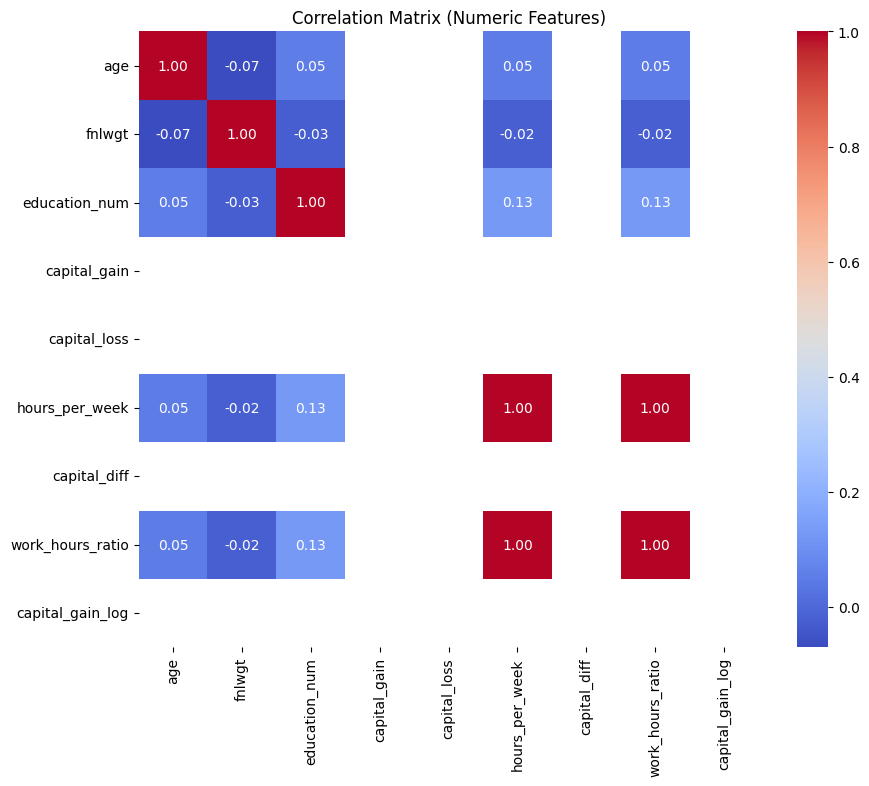

In [158]:
# Correlation Matrix (numerical features only):

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()
